In [1]:
from google.colab import drive
drive.mount('/content/drive')
current_directory = '/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data'


Mounted at /content/drive


In [1]:
using_colab = True
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-9ecf0fcb9d7b>", line 3, in <cell line: 2>
    import torch
  File "/usr/local/lib/python3.10/dist-packages/torch/__init__.py", line 229, in <module>
    from torch._C import *  # noqa: F403
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(

TypeError: ignored

In [4]:
%pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-zby6ap2a
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-zby6ap2a
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit 2ebcd001b0ed9dac9645ed54c35def2bba3ddbd2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-zdamnapj/groundingdino_cdafae4d68034bc2bb898ffaa76f83ff
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-zdamnapj/groundingdino_cdafae4d68034bc2bb898ffaa76f83ff
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 6c27bc76b9c7252c201e0b8c680d7349a7a0aaf8
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fac

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from lang_sam import LangSAM
from PIL import Image
from lang_sam.utils import draw_image

In [2]:
def prep_mask_image(anns):
    if len(anns) == 0:
        return None
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    img = (img * 255).astype(np.uint8)  # Convert to uint8 range (0-255)
    return Image.fromarray(img)


In [3]:
# image = cv2.imread(r'C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\Prepared\Train\images\image_2023-07-14_21-27-23-748533_1.png')
#image = cv2.imread(r'C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\Prepared\Train\images\image-682596207.jpg')
#image = r'/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/Prepared/Train/images/image_2023-07-14_21-27-23-748533_1.jpg'


image = cv2.imread(r'/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/Prepared/Train/images/image_2023-07-14_21-27-23-748533_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

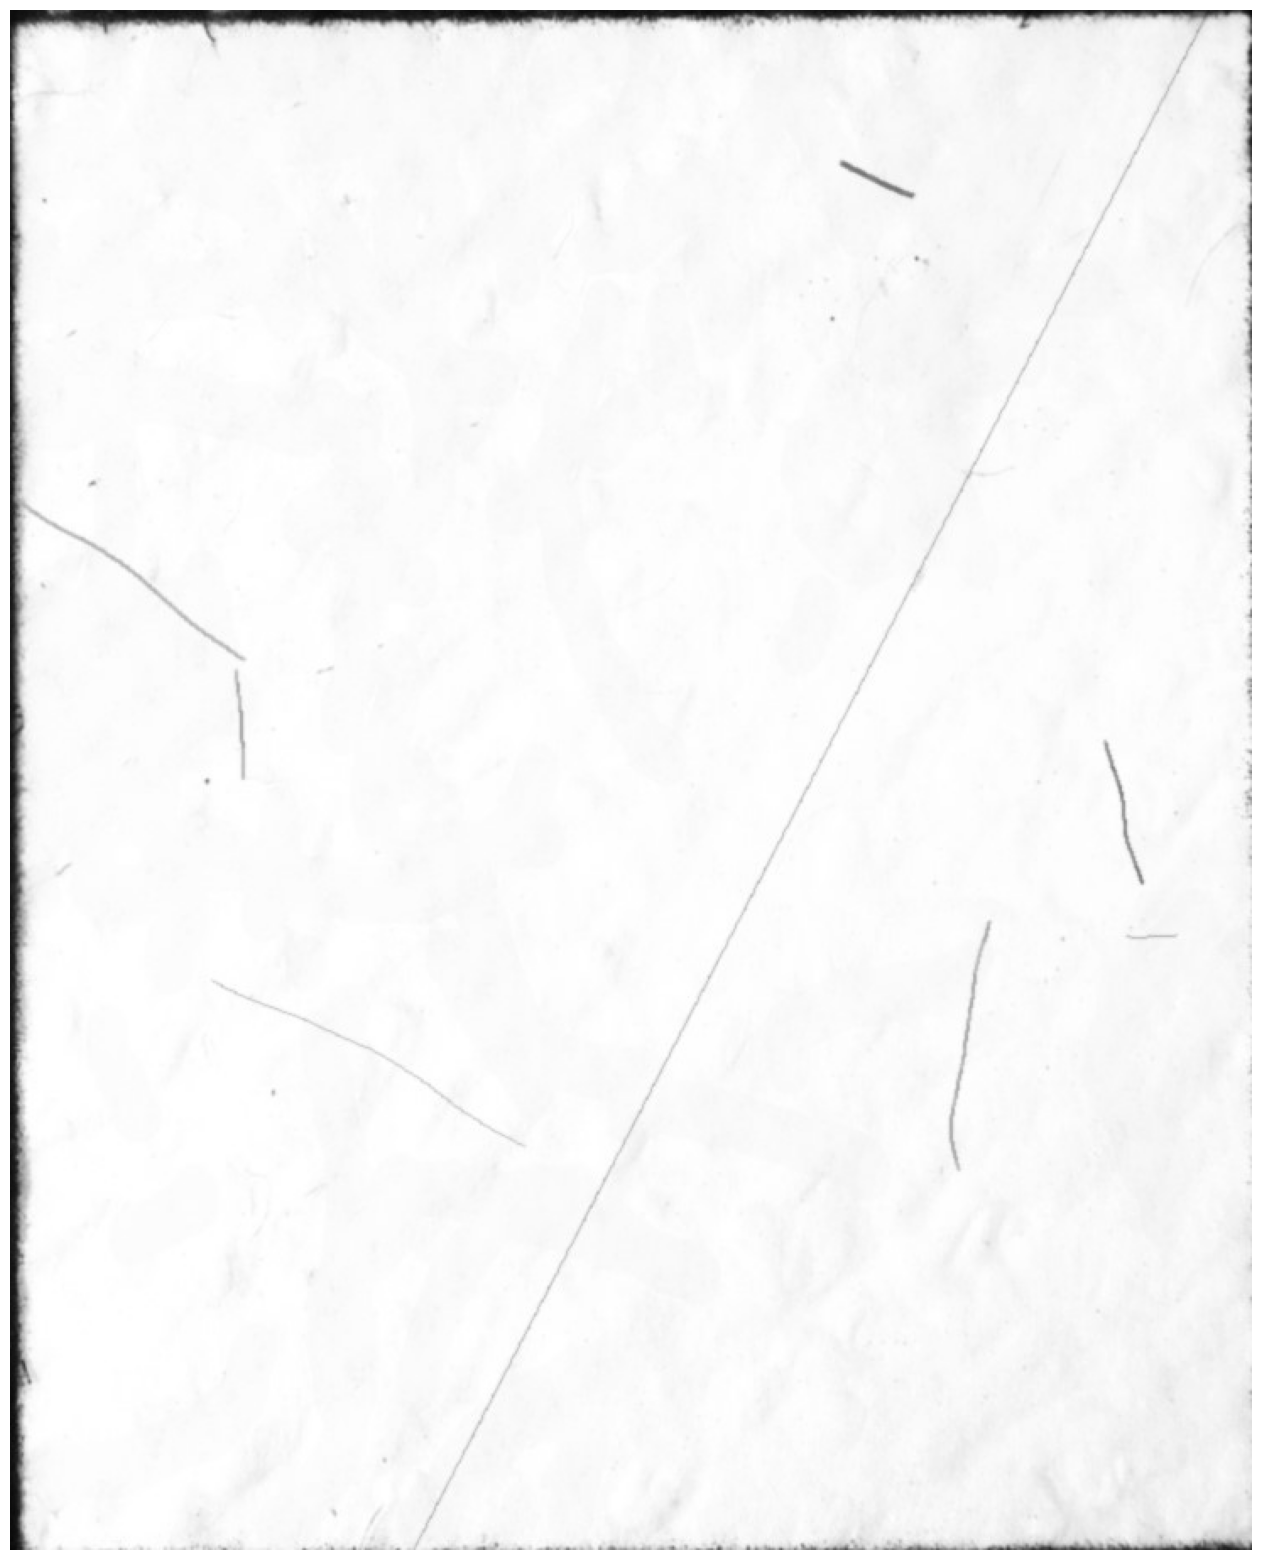

In [4]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [23]:
%pip install segment-geospatial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 8.3 MB/s eta 0:00:00


In [5]:
#from samgeo.text_sam import LangSAM

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
image1 = cv2.imread(r'/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/Prepared/Train/images/8351371536_3f22afa0bb_b-2719963105.jpg')

In [16]:
# image1 = Image.open(r'/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/Prepared/Train/images/image_2023-07-14_21-27-23-748533_1.jpg')

# # Convert the image to grayscale
# grayscale_image = image1.convert("L")

# # Convert the grayscale image to binary black and white
# #binary_bw_image = grayscale_image.point(lambda x: 0 if x < 128 else 255, "1")

#     # Create a new RGB image with grayscale values in all channels
# rgb_bw_image = Image.new("RGB", grayscale_image.size)
# rgb_bw_image.paste(grayscale_image)

In [10]:
# text_prompt = "lines"

In [17]:
#sam.predict(rgb_bw_image, text_prompt, box_threshold=0.24, text_threshold=0.24)

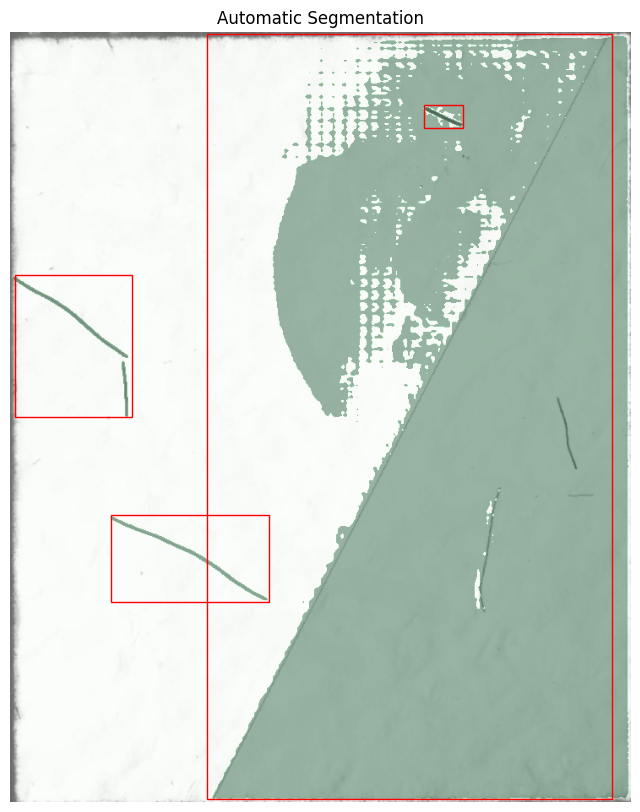

In [18]:
# sam.show_anns(
#     cmap='Greens',
#     box_color='red',
#     title='Automatic Segmentation',
#     blend=True,
# )

In [5]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [6]:
masks = mask_generator.generate(image)





In [7]:
mask_image = prep_mask_image(masks)

In [8]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

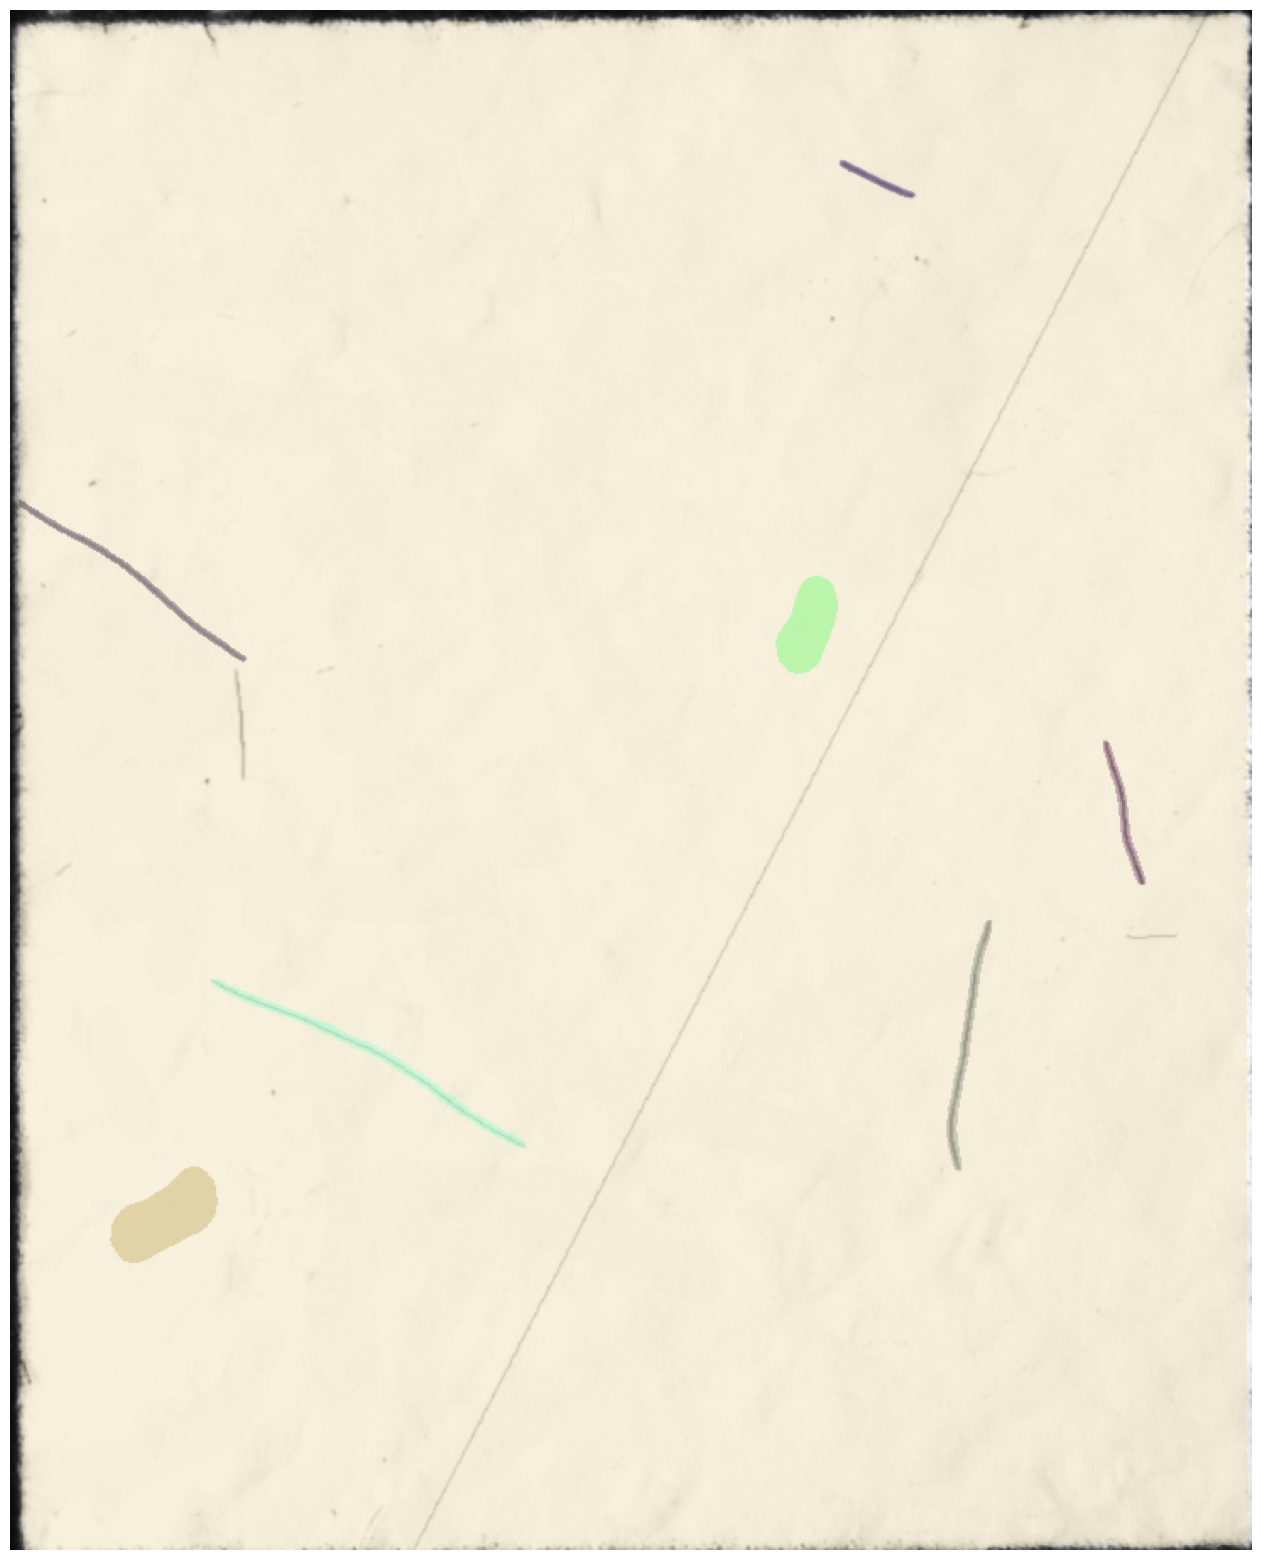

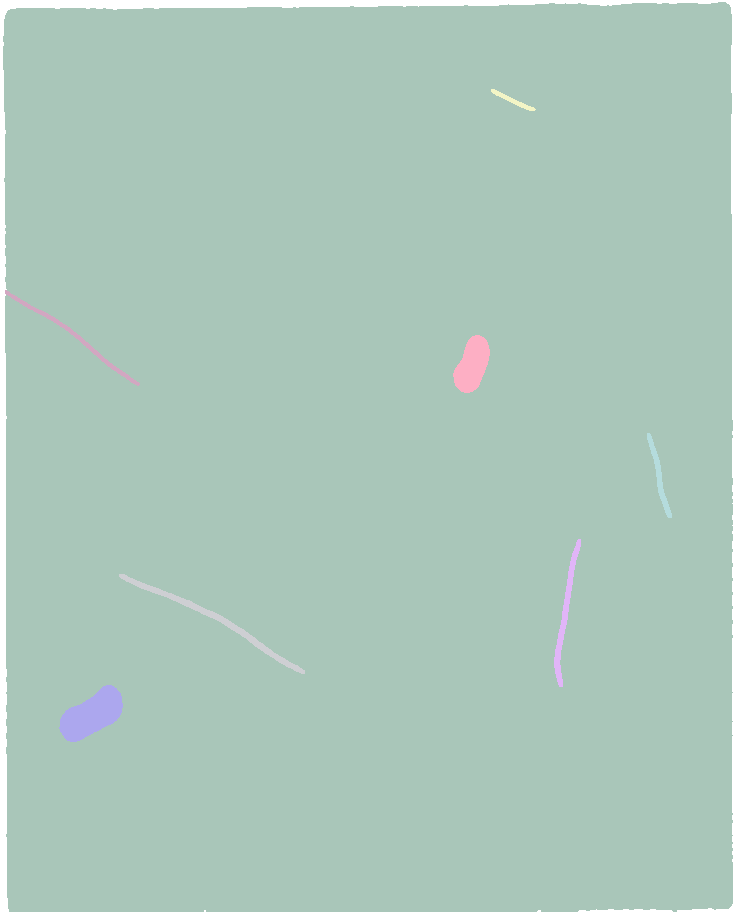

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()
mask_image

In [77]:
mask_image

PIL.Image.Image

In [11]:
samL = LangSAM()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight'])


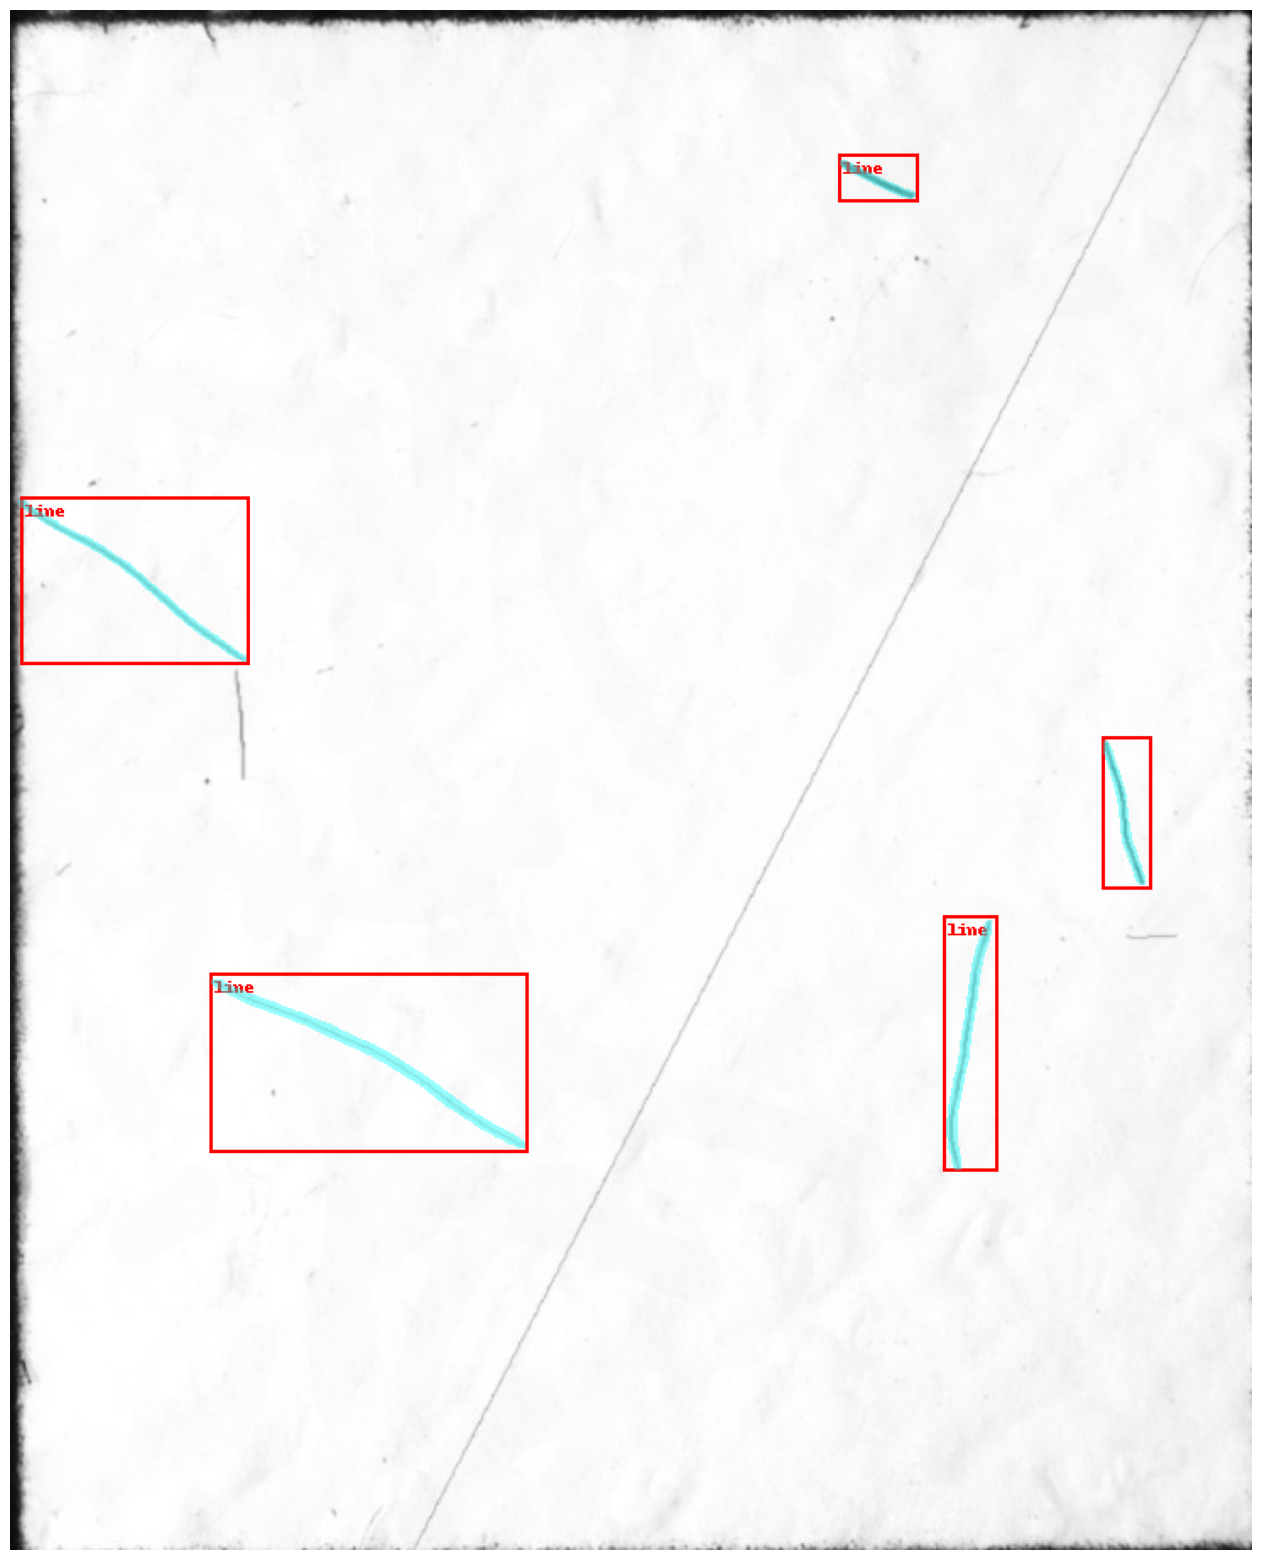

In [65]:

grayscale_image = mask_image.convert("L")

    # Create a new RGB image with grayscale values in all channels
rgb_bw_image = Image.new("RGB", grayscale_image.size)
rgb_bw_image.paste(grayscale_image)

# Convert the image to grayscale
text_prompt = "line"
masks, boxes, labels, logits = samL.predict(rgb_bw_image, text_prompt, box_threshold=0.20, text_threshold=0.24)
boxes

image_array = np.array(image1)
image101 = draw_image(image_array, masks, boxes, labels)
plt.figure(figsize=(20,20))
plt.imshow(image101)

plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:874: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


tensor([[118.4263, 570.8284, 306.8397, 676.2451],
        [490.5887,  85.4751, 537.7585, 113.7505],
        [  6.5744, 288.6357, 141.2695, 387.6053],
        [646.2592, 430.2917, 675.4250, 520.2028],
        [552.8107, 536.6081, 584.2806, 687.5256]])

In [78]:
imageDD= r'/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/Prepared/Train/images/image_2023-07-14_21-27-23-748533_1.jpg'
imageDD1 = Image.open(imageDD)
grayscale_image = imageDD1.convert("L")

# Convert image to NumPy ndarray
#image_array = np.array(imageDD1)

    # Create a new RGB image with grayscale values in all channels
rgb_bw_image = Image.new("RGB", grayscale_image.size)
rgb_bw_image.paste(grayscale_image)

image_array = np.array(grayscale_image)

# Convert the image to grayscale
text_prompt = "line"
masks, boxes, labels, logits = samL.predict(rgb_bw_image, text_prompt, box_threshold=0.20, text_threshold=0.24)
boxes

# #image_array = np.array(image1)
# image101 = draw_image(image_array, masks, boxes, labels)
# plt.figure(figsize=(20,20))
# plt.imshow(image101)

# plt.axis('off')
# plt.show()

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:874: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


tensor([[233.0674,   3.2130, 712.7198, 907.9463],
        [489.8769,  85.5488, 536.4767, 113.3125]])

In [89]:
image101 = draw_image(image_array, masks, boxes, labels)
plt.figure(figsize=(20,20))
plt.imshow(image101)

plt.axis('off')
plt.show()

RuntimeError: ignored

In [84]:
masks.shape

torch.Size([2, 912, 735])

In [85]:
array = masks.detach().cpu().numpy()
mask_image = prep_mask_image(array)
mask_image

IndexError: ignored

### Display the final mask

In [ ]:
def save_mask(mask_np, filename):
    mask_image = Image.fromarray((mask_np * 255).astype(np.uint8))
    mask_image.save(filename)

def display_image_with_masks(image, masks):
    num_masks = len(masks)

    fig, axes = plt.subplots(1, num_masks + 1, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    for i, mask_np in enumerate(masks):
        axes[i+1].imshow(mask_np, cmap='gray')
        axes[i+1].set_title(f"Mask {i+1}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

def display_image_with_boxes(image, boxes, logits):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_title("Image with Bounding Boxes")
    ax.axis('off')

    for box, logit in zip(boxes, logits):
        x_min, y_min, x_max, y_max = box
        confidence_score = round(logit.item(), 2)  # Convert logit to a scalar before rounding
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Draw bounding box
        rect = plt.Rectangle((x_min, y_min), box_width, box_height, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        # Add confidence score as text
        ax.text(x_min, y_min, f"Confidence: {confidence_score}", fontsize=8, color='red', verticalalignment='top')

    plt.show()

def print_bounding_boxes(boxes):
    print("Bounding Boxes:")
    for i, box in enumerate(boxes):
        print(f"Box {i+1}: {box}")

def print_detected_phrases(phrases):
    print("\nDetected Phrases:")
    for i, phrase in enumerate(phrases):
        print(f"Phrase {i+1}: {phrase}")

def print_logits(logits):
    print("\nConfidence:")
    for i, logit in enumerate(logits):
        print(f"Logit {i+1}: {logit}")

In [ ]:
if len(masks) == 0:
    print(f"No objects of the '{text_prompt}' prompt detected in the image.")
else:
    # Convert masks to numpy arrays
    masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

    # Display the original image and masks side by side
    display_image_with_masks(image, masks_np)

    # Display the image with bounding boxes and confidence scores
    display_image_with_boxes(image, boxes, logits)

    # Save the masks
    for i, mask_np in enumerate(masks_np):
        mask_path = f"image_mask_{i+1}.png"
        save_mask(mask_np, mask_path)

    # Print the bounding boxes, phrases, and logits
    print_bounding_boxes(boxes)
    print_detected_phrases(phrases)
    print_logits(logits)